In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from mnist import train_images, test_images, train_labels, test_labels
import numpy as np
import math
from collections import namedtuple
from functools import partial

np.seterr(all='raise')
pass

In [3]:
class nnClassifier():
    
    def __init__(self, h, ll):
        self.sigma = lambda x : (1 + 2.7182818284590452354 ** (-x)) ** (-1)
        self.h = h
        self.ll = ll

    def fit(self, x, y):
        n = x[0].shape[0]
        m = y[0].shape[0]
        l = x.shape[0]
        
        w0 = (np.random.random((n, self.h)) - 0.5) / n
        w1 = (np.random.random((self.h, m)) - 0.5) / m
        q = l / 10.0
        EPS = 1e-5

        iteration = 0
        while True:
            i = np.random.randint(l)
            u = self.sigma(x[i].dot(w0))
            a = self.sigma(u.dot(w1))
            eps1 = a - y[i]
            q_i = np.sum(eps1 * eps1)
            
            eps0 = w1.dot(eps1 * a * (1 - a))
            
            w1 -= self.ll * np.outer(u,    eps1 * a * (1 - a))
            w0 -= self.ll * np.outer(x[i], eps0 * u * (1 - u))
            new_q = (l - 1) / l * q + q_i / l
            
            if abs(new_q - q) < EPS:
                break
            iteration += 1
            if iteration % 30000 == 0:
                print(iteration, q)
            q = new_q
            
        self.w0 = w0
        self.w1 = w1

    def predict(self, point):
        u = self.sigma(point.dot(self.w0))
        a = self.sigma(u.dot(self.w1))
        return a

In [12]:
class mnistAdapter():
    def __init__(self, classifier):
        self.classifier = classifier
        
    def fit(self, x, y):
        x_my = x.reshape((x.shape[0], -1)).astype(np.float) / 255
        y_my = np.identity(10)[y]
        self.classifier.fit(x_my, y_my)
        
    def predict(self, point):
        point_my = point.reshape((-1)).astype(np.float) / 255
        return np.argmax(self.classifier.predict(point_my))

In [18]:
mnistNN = mnistAdapter(nnClassifier(28, 1))
mnistNN.fit(train_images(), train_labels())

30000 3639.30513026
60000 2207.39629152
90000 1338.89863194
120000 812.127265523
150000 492.622979386
180000 298.836703061
210000 181.29332415
240000 110.000205562
270000 66.7582065803
300000 40.531009895
330000 24.6206184542
360000 14.9704094454
390000 9.11770151863
420000 5.56627657584
450000 3.41292672342


In [33]:
test_predictions = np.array([mnistNN.predict(point) for point in test_images()])
wrong_answers = np.nonzero(test_predictions - test_labels())[0]
accuracy = 100 - len(wrong_answers) / len(test_images()) * 100

In [34]:
print(accuracy)

94.44


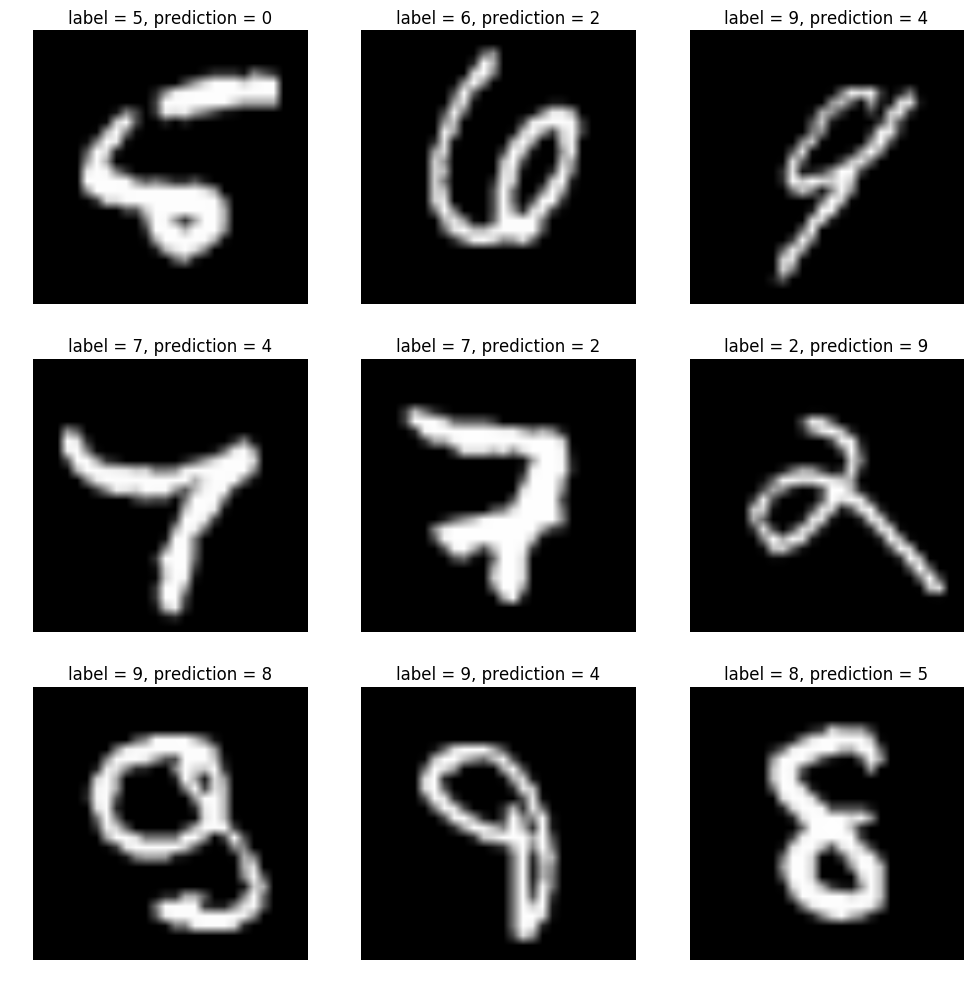

In [44]:
fig = plt.figure(figsize = (12, 12))
for i, wrong_i in zip(range(9), wrong_answers):
    subplot = fig.add_subplot(3, 3, i + 1)
    subplot.imshow(test_images()[wrong_i], cmap='gray')
    subplot.axis("off")
    subplot.set_title("label = {}, prediction = {}".format(test_labels()[wrong_i], test_predictions[wrong_i]))
plt.show()